In [1]:
import os
os.environ["OPENBLAS_NUM_THREADS"] = "1"
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.append('../..')

In [2]:
import pickle
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import adjusted_rand_score

In [3]:
from pygraphs.measure import *
from pygraphs.cluster import *
from pygraphs.graphs import StochasticBlockModel
from pygraphs.scenario import ParallelByGraphs
from pygraphs.measure import logComm_K, kernels

In [4]:
graphs, info = StochasticBlockModel(100, 2, p_in=0.3, p_out=0.15).generate_graphs(200)

In [5]:
results = defaultdict(dict)

In [6]:
colors = [
    '#1f77b4',
    '#ff7f0e',
    '#2ca02c',
    '#d62728',
    '#9467bd',
    '#8c564b',
    '#e377c2',
    '#7f7f7f',
    '#bcbd22'
]

pWalk KernelKMeans



pWalk KernelKMeans_vanilla



pWalk KMeans_sklearn


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class KMeans_sklearn is deprecated; This is not a kernel method!
  warnings.warn(msg, category=DeprecationWarning)



pWalk KernelKMeans_kernlab



pWalk SpectralClustering_sklearn



pWalk SpectralClustering_rubanov



pWalk SpectralClustering_kernlab_-min



pWalk SpectralClustering_kernlab_+100



pWalk KernelWard


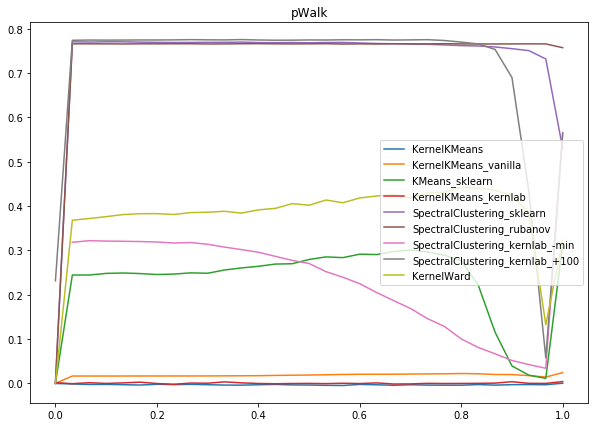

Walk KernelKMeans



Walk KernelKMeans_vanilla



Walk KMeans_sklearn


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class KMeans_sklearn is deprecated; This is not a kernel method!
  warnings.warn(msg, category=DeprecationWarning)



Walk KernelKMeans_kernlab



Walk SpectralClustering_sklearn



Walk SpectralClustering_rubanov



Walk SpectralClustering_kernlab_-min



Walk SpectralClustering_kernlab_+100



Walk KernelWard


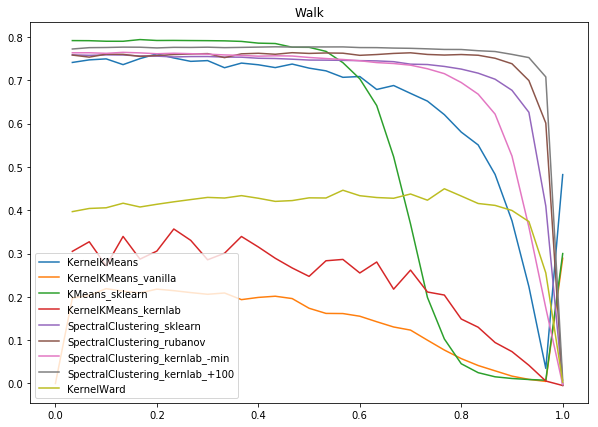

For KernelKMeans



For KernelKMeans_vanilla



For KMeans_sklearn


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class KMeans_sklearn is deprecated; This is not a kernel method!
  warnings.warn(msg, category=DeprecationWarning)



For KernelKMeans_kernlab



For SpectralClustering_sklearn



For SpectralClustering_rubanov



For SpectralClustering_kernlab_-min



For SpectralClustering_kernlab_+100



For KernelWard


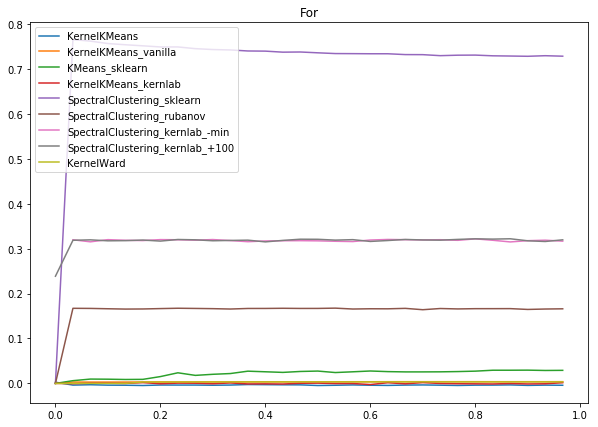

logFor KernelKMeans



logFor KernelKMeans_vanilla



logFor KMeans_sklearn


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class KMeans_sklearn is deprecated; This is not a kernel method!
  warnings.warn(msg, category=DeprecationWarning)



logFor KernelKMeans_kernlab



logFor SpectralClustering_sklearn



logFor SpectralClustering_rubanov



logFor SpectralClustering_kernlab_-min



logFor SpectralClustering_kernlab_+100



logFor KernelWard


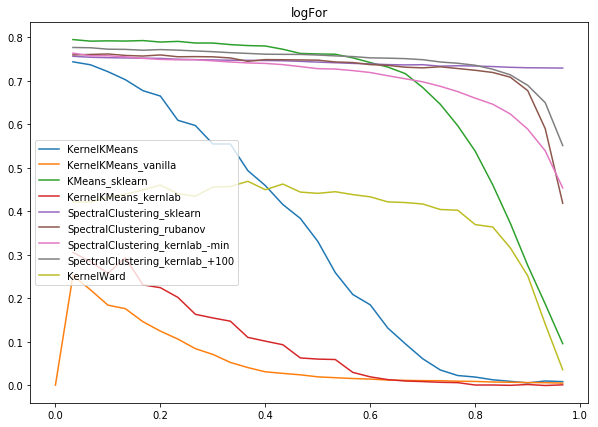

Comm KernelKMeans



Comm KernelKMeans_vanilla



Comm KMeans_sklearn


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class KMeans_sklearn is deprecated; This is not a kernel method!
  warnings.warn(msg, category=DeprecationWarning)



Comm KernelKMeans_kernlab



Comm SpectralClustering_sklearn



Comm SpectralClustering_rubanov



Comm SpectralClustering_kernlab_-min



Comm SpectralClustering_kernlab_+100



Comm KernelWard


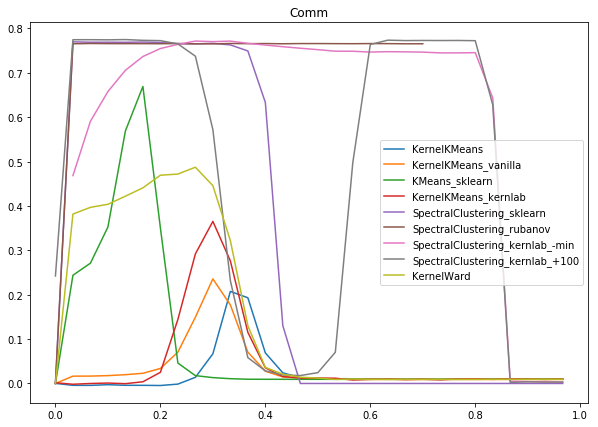

logComm KernelKMeans



logComm KernelKMeans_vanilla



logComm KMeans_sklearn


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class KMeans_sklearn is deprecated; This is not a kernel method!
  warnings.warn(msg, category=DeprecationWarning)



logComm KernelKMeans_kernlab



logComm SpectralClustering_sklearn



logComm SpectralClustering_rubanov



logComm SpectralClustering_kernlab_-min



logComm SpectralClustering_kernlab_+100



logComm KernelWard


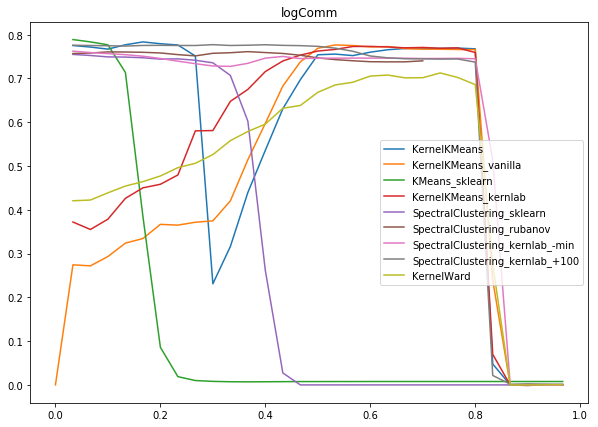

Heat KernelKMeans



Heat KernelKMeans_vanilla



Heat KMeans_sklearn


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class KMeans_sklearn is deprecated; This is not a kernel method!
  warnings.warn(msg, category=DeprecationWarning)



Heat KernelKMeans_kernlab



Heat SpectralClustering_sklearn



Heat SpectralClustering_rubanov



Heat SpectralClustering_kernlab_-min



Heat SpectralClustering_kernlab_+100



Heat KernelWard


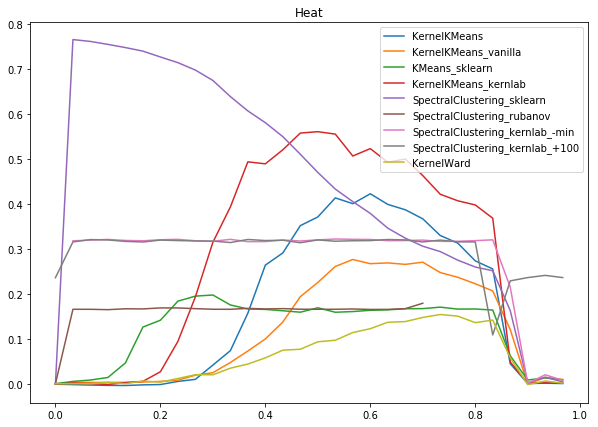

logHeat KernelKMeans



logHeat KernelKMeans_vanilla



logHeat KMeans_sklearn


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class KMeans_sklearn is deprecated; This is not a kernel method!
  warnings.warn(msg, category=DeprecationWarning)



logHeat KernelKMeans_kernlab



logHeat SpectralClustering_sklearn



logHeat SpectralClustering_rubanov



logHeat SpectralClustering_kernlab_-min



logHeat SpectralClustering_kernlab_+100



logHeat KernelWard


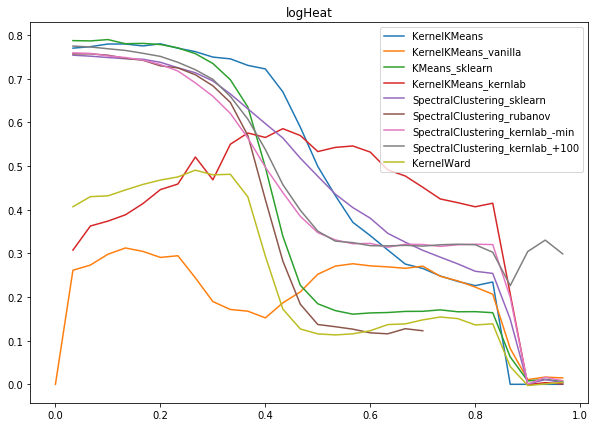

SCT KernelKMeans



SCT KernelKMeans_vanilla



SCT KMeans_sklearn


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class KMeans_sklearn is deprecated; This is not a kernel method!
  warnings.warn(msg, category=DeprecationWarning)



SCT KernelKMeans_kernlab



SCT SpectralClustering_sklearn



SCT SpectralClustering_rubanov



SCT SpectralClustering_kernlab_-min



SCT SpectralClustering_kernlab_+100



SCT KernelWard


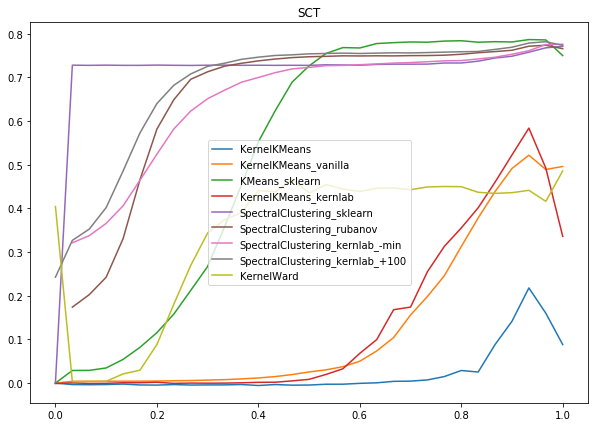

SCCT KernelKMeans



SCCT KernelKMeans_vanilla



SCCT KMeans_sklearn


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class KMeans_sklearn is deprecated; This is not a kernel method!
  warnings.warn(msg, category=DeprecationWarning)



SCCT KernelKMeans_kernlab



SCCT SpectralClustering_sklearn



SCCT SpectralClustering_rubanov



SCCT SpectralClustering_kernlab_-min



SCCT SpectralClustering_kernlab_+100



SCCT KernelWard


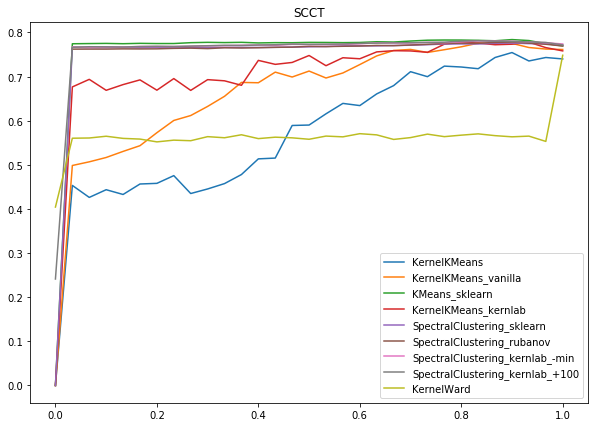

RSP KernelKMeans



RSP KernelKMeans_vanilla



RSP KMeans_sklearn


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class KMeans_sklearn is deprecated; This is not a kernel method!
  warnings.warn(msg, category=DeprecationWarning)



RSP KernelKMeans_kernlab



RSP SpectralClustering_sklearn



RSP SpectralClustering_rubanov



RSP SpectralClustering_kernlab_-min



RSP SpectralClustering_kernlab_+100



RSP KernelWard


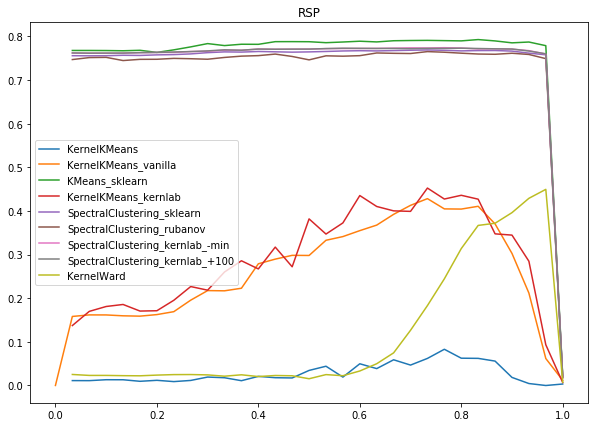

FE KernelKMeans



FE KernelKMeans_vanilla



FE KMeans_sklearn


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class KMeans_sklearn is deprecated; This is not a kernel method!
  warnings.warn(msg, category=DeprecationWarning)



FE KernelKMeans_kernlab



FE SpectralClustering_sklearn



FE SpectralClustering_rubanov



FE SpectralClustering_kernlab_-min



FE SpectralClustering_kernlab_+100



FE KernelWard


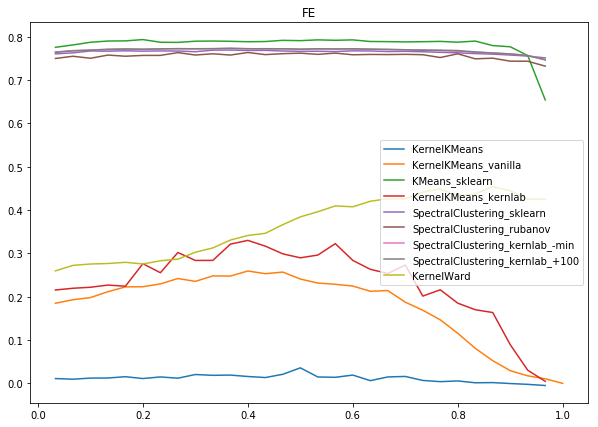

PPR KernelKMeans



PPR KernelKMeans_vanilla



PPR KMeans_sklearn


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class KMeans_sklearn is deprecated; This is not a kernel method!
  warnings.warn(msg, category=DeprecationWarning)



PPR KernelKMeans_kernlab



PPR SpectralClustering_sklearn



PPR SpectralClustering_rubanov



PPR SpectralClustering_kernlab_-min



PPR SpectralClustering_kernlab_+100



PPR KernelWard


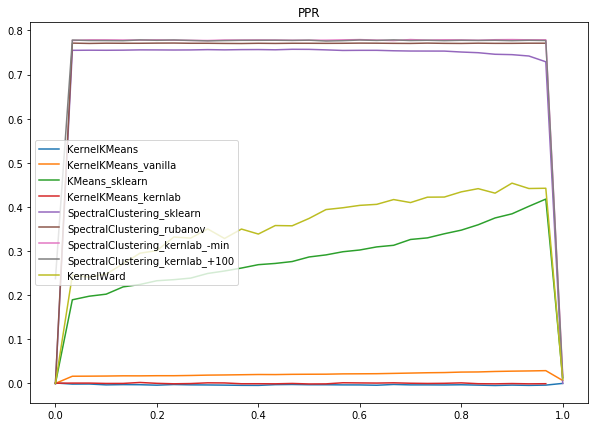

logPPR KernelKMeans



logPPR KernelKMeans_vanilla



logPPR KMeans_sklearn


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class KMeans_sklearn is deprecated; This is not a kernel method!
  warnings.warn(msg, category=DeprecationWarning)



logPPR KernelKMeans_kernlab



logPPR SpectralClustering_sklearn



logPPR SpectralClustering_rubanov



logPPR SpectralClustering_kernlab_-min



logPPR SpectralClustering_kernlab_+100



logPPR KernelWard


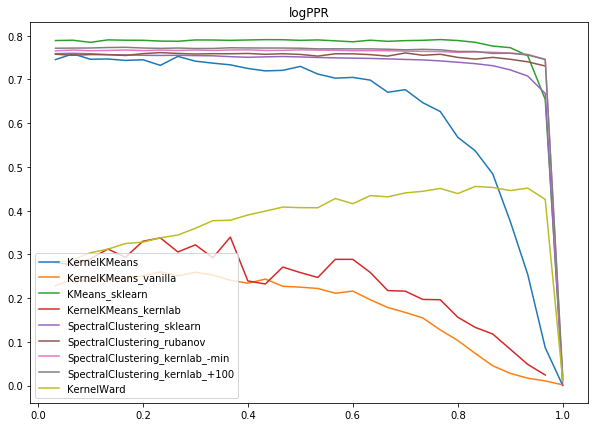

ModifPPR KernelKMeans



ModifPPR KernelKMeans_vanilla



ModifPPR KMeans_sklearn


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class KMeans_sklearn is deprecated; This is not a kernel method!
  warnings.warn(msg, category=DeprecationWarning)



ModifPPR KernelKMeans_kernlab



ModifPPR SpectralClustering_sklearn



ModifPPR SpectralClustering_rubanov



ModifPPR SpectralClustering_kernlab_-min



ModifPPR SpectralClustering_kernlab_+100



ModifPPR KernelWard


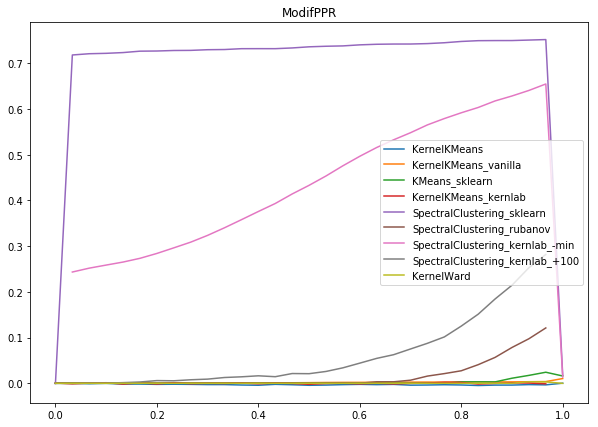

logModifPPR KernelKMeans



logModifPPR KernelKMeans_vanilla



logModifPPR KMeans_sklearn


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class KMeans_sklearn is deprecated; This is not a kernel method!
  warnings.warn(msg, category=DeprecationWarning)



logModifPPR KernelKMeans_kernlab



logModifPPR SpectralClustering_sklearn



logModifPPR SpectralClustering_rubanov



logModifPPR SpectralClustering_kernlab_-min



logModifPPR SpectralClustering_kernlab_+100



logModifPPR KernelWard


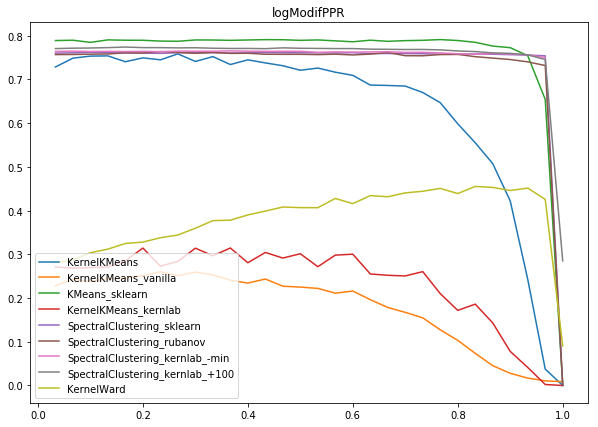

HeatPPR KernelKMeans



HeatPPR KernelKMeans_vanilla



HeatPPR KMeans_sklearn


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class KMeans_sklearn is deprecated; This is not a kernel method!
  warnings.warn(msg, category=DeprecationWarning)



HeatPPR KernelKMeans_kernlab



HeatPPR SpectralClustering_sklearn



HeatPPR SpectralClustering_rubanov



HeatPPR SpectralClustering_kernlab_-min



HeatPPR SpectralClustering_kernlab_+100



HeatPPR KernelWard


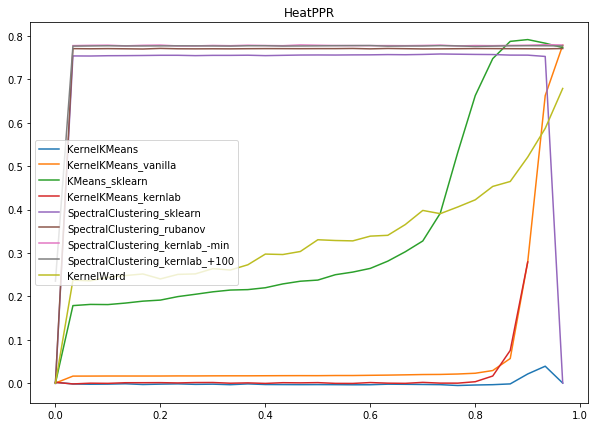

logHeatPPR KernelKMeans



logHeatPPR KernelKMeans_vanilla



logHeatPPR KMeans_sklearn


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class KMeans_sklearn is deprecated; This is not a kernel method!
  warnings.warn(msg, category=DeprecationWarning)



logHeatPPR KernelKMeans_kernlab



logHeatPPR SpectralClustering_sklearn



logHeatPPR SpectralClustering_rubanov



logHeatPPR SpectralClustering_kernlab_-min



logHeatPPR SpectralClustering_kernlab_+100



logHeatPPR KernelWard


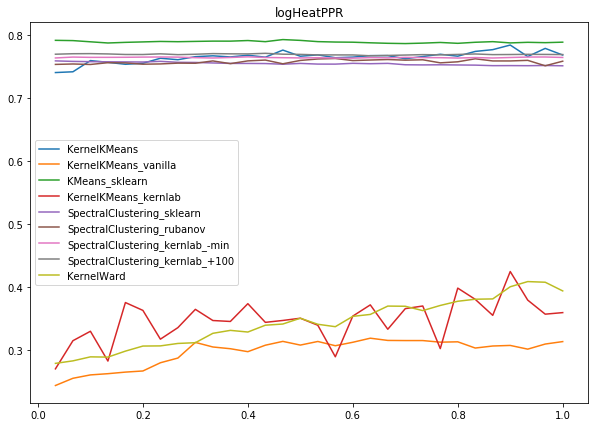

SP-CT KernelKMeans



SP-CT KernelKMeans_vanilla



SP-CT KMeans_sklearn


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class KMeans_sklearn is deprecated; This is not a kernel method!
  warnings.warn(msg, category=DeprecationWarning)



SP-CT KernelKMeans_kernlab



SP-CT SpectralClustering_sklearn



SP-CT SpectralClustering_rubanov



SP-CT SpectralClustering_kernlab_-min



SP-CT SpectralClustering_kernlab_+100



SP-CT KernelWard


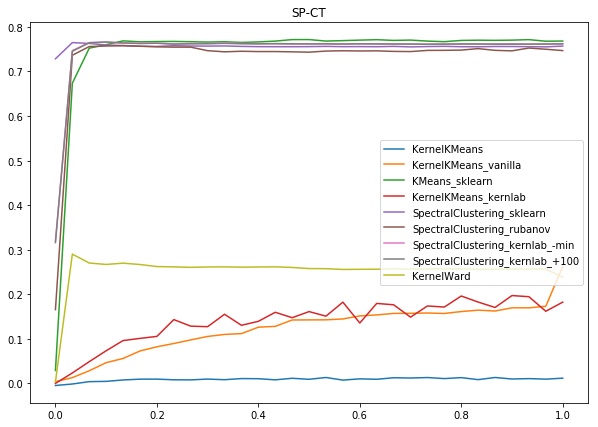

In [7]:
exp = ParallelByGraphs(adjusted_rand_score, np.linspace(0, 1, 31), progressbar=True)#, verbose=True)

for measure in kernels:
    for alg in [
        KKMeans,
        KKMeans_vanilla,
        KMeans_sklearn,
        KKMeans_kernlab,
        SpectralClustering_sklearn,
        SpectralClustering_rubanov,
        SpectralClustering_kernlab,
        SpectralClustering_kernlab_100,
        KWard
    ]:
        print(measure.name, alg.name)
        results[measure.name][alg.name] = exp.perform(alg, measure, graphs, 2, n_jobs=-1)
        with open(measure.name + ' ' + alg.name + '.pkl', 'wb') as f:
            pickle.dump(results[measure.name][alg.name], f)
            
    fig, ax = plt.subplots(1, figsize=(10, 7))
    for idx, (result_name, result_value) in enumerate(results[measure.name].items()):
        plt.plot(result_value[0], result_value[1], label=result_name, color=colors[idx])
    plt.legend()
    plt.title(measure.name)
    plt.show()

In [8]:
result_name

'KernelWard'

## 